## 필수과제1 (타이타닉데이터셋)
- VarianceThreshold -타이타닉 데이터 feature_selection
    - 임계값 기준을 몇으로 했는지?
    - 그 기준의 이유
    - 어떤 식으로 찾았는지!
- 어떤 피처가 선택이 되었나?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder

In [2]:
tt = sns.load_dataset('titanic')
tt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
#객체형 컬럼 선택
#결측치 처리
tt['age'].fillna(tt['age'].median(), inplace = True)
tt['embark_town'].fillna(tt['embark_town'].mode()[0], inplace = True)
tt['fare'].fillna(tt['fare'].median(), inplace = True)

/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_58746/2631293832.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt['age'].fillna(tt['age'].median(), inplace = True)
/var/folders/gy/ylcsy3wj18b_80z186rb1dcw0000gn/T/ipykernel_58746/2631293832.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [5]:
#사용할 피처 정리
X = tt[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = tt['survived']

In [6]:
X = X.dropna()

In [7]:
# 수치형 특성 선택
numeric_features = tt.select_dtypes(include=['float64', 'int64'])

# 각 특성의 분산 계산
variances = numeric_features.var()
print(variances)

survived       0.236772
pclass         0.699015
age          169.512498
sibsp          1.216043
parch          0.649728
fare        2469.436846
dtype: float64


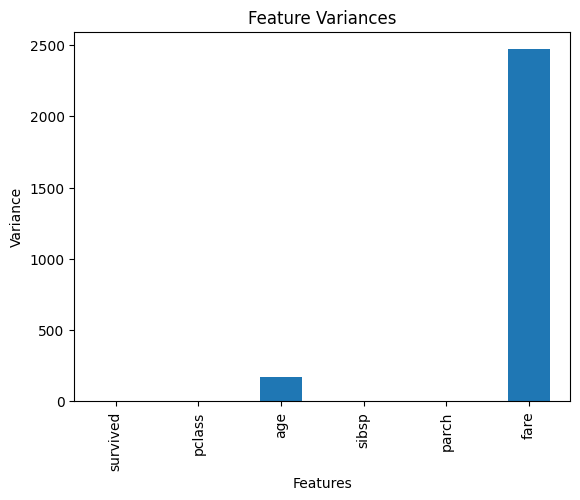

In [20]:
variances.plot(kind='bar')
plt.title('Feature Variances')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

In [9]:
# 분산의 10분위수 계산
threshold_value = variances.quantile(0.1)
print(f'Selected threshold: {threshold_value}')

Selected threshold: 0.44325023014162257


In [10]:
# VarianceThreshold 적용
selector = VarianceThreshold(threshold=threshold_value)
reduced_data = selector.fit_transform(numeric_features)

# 선택된 특성의 인덱스
selected_features = numeric_features.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
